# **Voting Ensemble Learning**

## **1. For Classification**

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
df.shape

(150, 5)

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

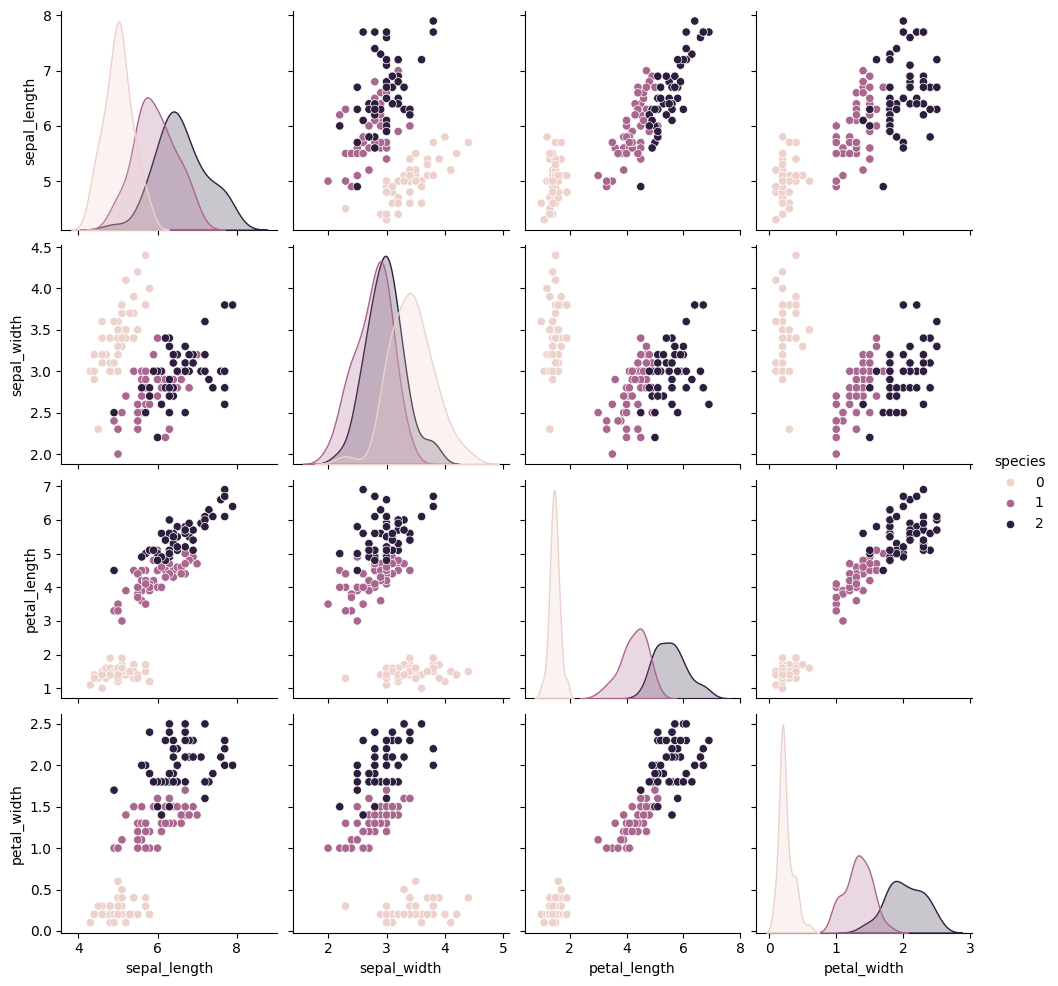

In [139]:
sns.pairplot(df,hue='species')

In [140]:
new_df = df[df['species'] != 0][['sepal_length','sepal_width','species']]

In [141]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [142]:
new_df.shape

(100, 3)

In [143]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [145]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [146]:
estimators = [('LR',clf1),('KNC',clf2),('RFC',clf3)]

In [147]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

LR 0.81
KNC 0.76
RFC 0.72


In [148]:
from sklearn.ensemble import VotingClassifier

### **Hard Voting**

In [149]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


### **Soft Voting**

In [150]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


### ****Classifiers of Same Algo****

In [151]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [152]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


## **2. For Regression**

In [153]:
from sklearn.datasets import load_diabetes
df2 = load_diabetes(return_X_y=True)

In [154]:
X.shape

(1000, 20)

In [155]:
y.shape

(1000,)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [157]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
svr = SVR()

In [158]:
estimators = [('lr',lr),('dtr',dtr),('svr',svr)]

In [159]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='r2')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.52


dtr 0.01
svr 0.73


In [160]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor:",np.round(np.mean(scores),2))

Voting Regressor: 0.6


In [161]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

In [162]:
estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

In [163]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 0.13
dt2 0.21
dt3 0.29
dt4 0.26
dt5 0.03


In [164]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.37
